In [ ]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [ ]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('Train.csv')
train.head()

,name,type,xmin,ymin,xmax,ymax
0,600.jpg,text,39,12,89,29
1,600.jpg,text,167,10,241,25
2,600.jpg,text,40,45,75,58
3,600.jpg,text,172,39,214,54
4,600.jpg,text,57,152,104,171


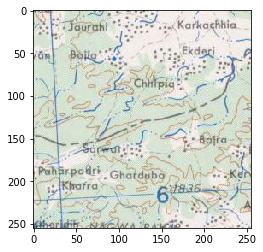

In [ ]:
# reading single image using imread function of matplotlib
image = plt.imread('train_images/600.jpg')
plt.imshow(image)

In [ ]:
# Number of unique training images
train['name'].nunique()

51

In [ ]:
# Number of classes
train['type'].value_counts()

text    426
Name: type, dtype: int64

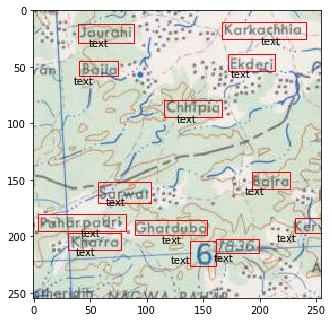

In [ ]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('train_images/600.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.name == "600.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.type == 'text':
        edgecolor = 'r'
        ax.annotate('text', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [ ]:
data = pd.DataFrame()
data['format'] = train['name']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [ ]:
ls

 annotate.txt     README.md         'Text Detection Implementation.ipynb'
 keras_frcnn/     requirements.txt   Train.csv
 LICENSE          test_frcnn.py      train_frcnn.py
 measure_map.py   test_image/        train_images/
